<a href="https://colab.research.google.com/github/SAyaanHussain/GreenSync/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Classifier**

Steps involved in training:

1.   Get The data

* -> List the data and how much you need,
* -> Find and document where you can get the data from,
* -> Check how much space the data will take
* -> Check legal obligations and get authorization if needed
* -> Get access to authorization
* -> Create a workspace
* -> Get the data
* -> Convert it into a form where you can view and manipulate data without changing the data itself
* -> Ensure sensitive information is deleted
* -> Check the size and type
* -> Perform TTS (test, train, split)





2. Explore the deata by creating a copy of the data for exploration (sampling it down) and study **each** attribute (Name of the attribute, type (categorical, float,int, bounded/unbounded, text, structured, number of **missing** **values** (very important), type of noise (stochastic, outliers, rounding errors, etc.) and the type of distribution (Gaussian, uniform, logarithm/exponential, etc ), visualise the data, study correlations between attributes, identify promising transformation you may wanna apply, identify extra data that would be useful, and document all your observations.

3. Prepare the data (Clean the data by fixing or removing outliers, filling in missing values (e.g., with zero, mean, median...) or directly drop their rows (or columns)), (perform feature selection by dropping attributes which are not useful for the task)

4. Shortlist Promising Models

5. Fine-tune the system

6. Present the solution

7. DEPLOYYYYYY !!!!

**Loading the** **Data**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/smsspamcollection.tsv", sep='\t')

# **Gain Insights about the Data 💪**

In [ ]:
print(df.head)

<bound method NDFrame.head of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
print(df.info)

<bound method DataFrame.info of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>


In [ ]:
X = df[['message', 'length', 'punct']]
y = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X

,message,length,punct
0,"Go until jurong point, crazy.. Available only ...",111,9
1,Ok lar... Joking wif u oni...,29,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,U dun say so early hor... U c already then say...,49,6
4,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,160,8
5568,Will ü b going to esplanade fr home?,36,1
5569,"Pity, * was in mood for that. So...any other s...",57,7
5570,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
y

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
X.iloc[0]

,0
message,"Go until jurong point, crazy.. Available only ..."
length,111
punct,9


In [ ]:
int(y.iloc[2]) # ham = 1, spam = 0

1

In [ ]:
df['label'] = df['label'].astype(str)
df['message'] = df['message'].astype(str)

In [ ]:
df.dtypes

,0
label,object
message,object
length,int64
punct,int64


# **Performing TTS**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # for class dist.
)

# **Exploring Further 👀**

In [ ]:
sample_df = df.sample(frac=0.5, random_state=42).copy()  # 50% we take sample

In [ ]:
sample_df.isnull().sum()
sample_df.isnull().mean() * 100

,0
label,0.0
message,0.0
length,0.0
punct,0.0


In [ ]:
sample_df.describe()

,length,punct
count,2786.000000,2786.000000
mean,79.332376,4.055994
std,58.798589,4.058250
min,2.000000,0.000000
25%,35.000000,1.000000
50%,61.000000,3.000000
75%,120.000000,5.000000
max,910.000000,52.000000


In [ ]:
sample_df[sample_df['length'] > 300]['message'].head()

,message
2380,"Good evening Sir, hope you are having a nice d..."
2972,Height of Confidence: All the Aeronautics prof...
5209,"I know you are thinkin malaria. But relax, chi..."
838,"Sir, I have been late in paying rent for the p..."
1586,I was wondering if it would be okay for you to...


In [ ]:
sample_df['length'].describe()

,length
count,2786.000000
mean,79.332376
std,58.798589
min,2.000000
25%,35.000000
50%,61.000000
75%,120.000000
max,910.000000


,label,message,length,punct,z
381,ham,I guess that's why you re worried. You must kn...,300,14,3.753615
2380,ham,"Good evening Sir, hope you are having a nice d...",482,15,6.849483
2972,ham,Height of Confidence: All the Aeronautics prof...,316,23,4.025779
5209,ham,"I know you are thinkin malaria. But relax, chi...",329,6,4.246912
838,ham,"Sir, I have been late in paying rent for the p...",372,13,4.978354
1586,ham,I was wondering if it would be okay for you to...,338,9,4.400005
1513,ham,"Hey sweet, I was wondering when you had a mome...",458,14,6.441236
711,ham,Height of Confidence: All the Aeronautics prof...,316,23,4.025779
3454,ham,Nowadays people are notixiquating the laxinorf...,274,12,3.311348
473,ham,Nothing. I meant that once the money enters yo...,298,18,3.719594


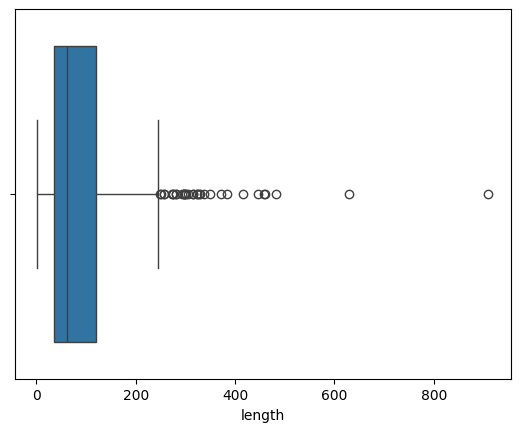

In [ ]:
import seaborn as sns
sns.boxplot(x=sample_df['length'])

# Z-score method
from scipy.stats import zscore
sample_df['z'] = zscore(sample_df['length'])

# Anything with |z| > 3 is a strong outlier
sample_df[np.abs(sample_df['z']) > 3]

In [ ]:
# z score = value - mean/std, outliers = noise type

Text(0.5, 1.0, 'length Distribution')

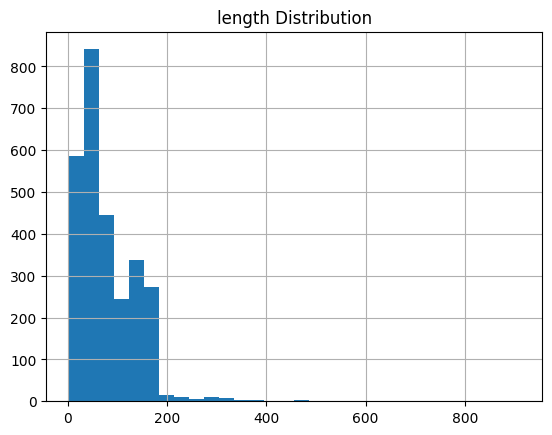

In [ ]:
import matplotlib.pyplot as plt
sample_df['length'].hist(bins=30)
plt.title("length Distribution")

Text(0.5, 1.0, 'Log-Transformed Length Distribution')

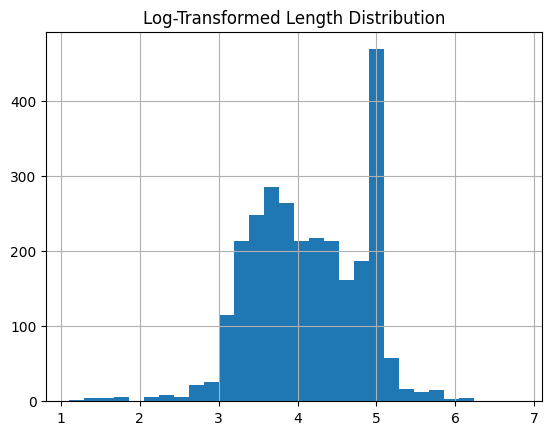

In [ ]:
import numpy as np
sample_df['log_length'] = np.log1p(sample_df['length'])
sample_df['log_length'].hist(bins=30)
plt.title("Log-Transformed Length Distribution")

In [ ]:
# type of distribution: logarithmic or exponential

In [ ]:
import scipy.stats as stats
import numpy as np

# Log-transform the data
log_data = np.log(sample_df['length'][sample_df['length'] > 0])

# Test normality on the log-transformed data
stat, p_value = stats.shapiro(log_data)
print(f"Shapiro-Wilk Test p-value: {p_value}") # Log/expo dist.

Shapiro-Wilk Test p-value: 1.275871994457456e-24


In [ ]:
Q1 = sample_df['length'].quantile(0.25)
Q3 = sample_df['length'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
filtered_df = sample_df[(sample_df['length'] >= Q1 - 1.5 * IQR) & (sample_df['length'] <= Q3 + 1.5 * IQR)]

# **Cleaning the Data**

In [ ]:
df.isnull().sum()
df.isnull().mean() * 100

,0
label,0.0
message,0.0
length,0.0
punct,0.0


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df[df['length'] > 300]['message'].head()

,message
155,"You are everywhere dirt, on the floor, the win..."
711,Height of Confidence: All the Aeronautics prof...
838,"Sir, I have been late in paying rent for the p..."
1085,For me the love should start with attraction.i...
1360,&lt;#&gt; %of pple marry with their lovers... ...


,label,message,length,punct,z
53,ham,Wow. I never realized that you were so embaras...,289,14,3.478790
155,ham,"You are everywhere dirt, on the floor, the win...",384,16,5.063773
381,ham,I guess that's why you re worried. You must kn...,300,14,3.662314
473,ham,Nothing. I meant that once the money enters yo...,298,18,3.628946
551,ham,Imagine you finally get to sink into that bath...,281,9,3.345317
...,...,...,...,...,...
5129,ham,"Rose for red,red for blood,blood for heart,hea...",281,30,3.345317
5209,ham,"I know you are thinkin malaria. But relax, chi...",329,6,4.146151
5264,ham,"Storming msg: Wen u lift d phne, u say ""HELLO""...",324,38,4.062731
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,6,4.146151


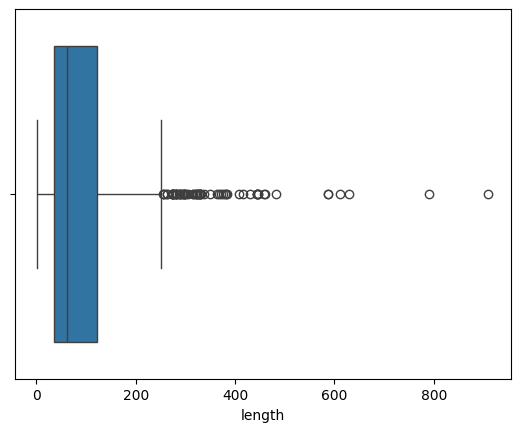

In [ ]:
import seaborn as sns
sns.boxplot(x=df['length'])

# Z-score method
from scipy.stats import zscore
df['z'] = zscore(df['length'])

# Anything with |z| > 3 is a strong outlier
df[np.abs(df['z']) > 3]

In [ ]:
import scipy.stats as stats
import numpy as np

# Log-transform the data
log_data = np.log(df['length'][df['length'] > 0])

# Test normality on the log-transformed data
stat, p_value = stats.shapiro(log_data)
print(f"Shapiro-Wilk Test p-value: {p_value}") # Log/expo dist. (verified)

Shapiro-Wilk Test p-value: 1.2448386365676594e-33


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5572.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
filtered_df = df[(df['length'] >= Q1 - 1.5 * IQR) & (df['length'] <= Q3 + 1.5 * IQR)]

# **Preprocessing & Vectorization**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Binary Bag-of-Words Vectorizer (presence/absence)
pipeline_binary = Pipeline([
    ('vectorizer', CountVectorizer(binary=True))  # binary=True makes it 0/1
])

# OR — Frequency-based Bag-of-Words Vectorizer (word counts)
pipeline_counts = Pipeline([
    ('vectorizer', CountVectorizer())  # default gives count of each word
])

# Sample emails
emails = [
    "Hello you Hello Hello you",
    "How are you",
    "Hello how how you"
]

# Fit and transform the emails
X_binary = pipeline_binary.fit_transform(emails)
X_counts = pipeline_counts.fit_transform(emails)

# To view it as a matrix
print(X_binary.toarray())
print(pipeline_binary.named_steps['vectorizer'].get_feature_names_out())

print(X_counts.toarray())
print(pipeline_counts.named_steps['vectorizer'].get_feature_names_out())


[[0 1 0 1]
 [1 0 1 1]
 [0 1 1 1]]
['are' 'hello' 'how' 'you']
[[0 3 0 2]
 [1 0 1 1]
 [0 1 2 1]]
['are' 'hello' 'how' 'you']


In [ ]:
import re
import string
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def custom_preprocessor(text,
                        lowercase=True,
                        remove_punct=True,
                        replace_urls=True,
                        replace_numbers=True,
                        stemming=True):

    # 1. Lowercase
    if lowercase:
        text = text.lower()

    # 2. Replace URLs
    if replace_urls:
        text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)

    # 3. Replace numbers
    if replace_numbers:
        text = re.sub(r'\b\d+\b', 'NUMBER', text)

    # 4. Remove punctuation
    if remove_punct:
        text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Stemming so wht it does it basically, reduces word to root form like ran -> run
    if stemming:
        words = text.split()
        words = [stemmer.stem(word) for word in words]
        text = ' '.join(words)

    return text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from functools import partial

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Wrap custom preprocessor with fixed hyperparameters
preprocess_fn = partial(custom_preprocessor,
                        lowercase=True,
                        remove_punct=True,
                        replace_urls=True,
                        replace_numbers=True,
                        stemming=True)

# For full data, just use:
X_train_final = X_train['message'] # Selecting only the 'message' column for training
y_train_final = y_train

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer(preprocessor=preprocess_fn)),
        ('classifier', model)
    ])

    pipeline.fit(X_train_final, y_train_final)
    score = pipeline.score(X_test['message'], y_test) # Selecting 'message' for testing as well
    print(f"{name} Score: {score:.4f}")

Naive Bayes Score: 0.9821
Logistic Regression Score: 0.9857
Random Forest Score: 0.9767
SVM Score: 0.9874


# **Testing**

In [ ]:
y_pred = pipeline.predict(X_test['message']) # Use the original X_test with 'message' column
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[965   1]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy: 0.9874439461883409


In [ ]:
my_email = ["Hey there, just checking if you’re free to catch up this weekend."]
prediction = pipeline.predict(my_email)
print("SPAM" if prediction[0] else "HAM")
def classify_email(email_text):
    prediction = pipeline.predict([email_text])
    return "SPAM" if prediction[0] else "HAM"
print(classify_email("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"))
print(classify_email("Hey, just wanted to send over the notes from class today."))

HAM
SPAM
HAM


# **Error Analysis**

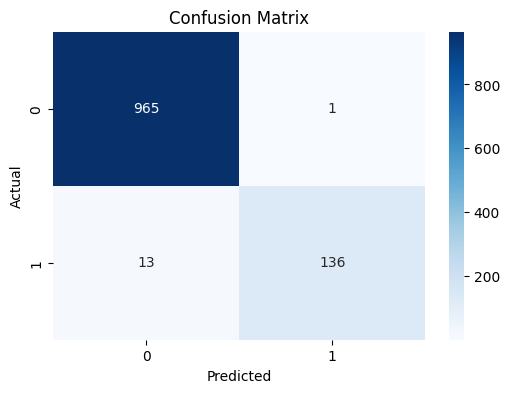

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict again if needed...
y_pred = pipeline.predict(X_test['message'])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()